# Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression

In [2]:
x,y = mr(n_samples=1000, n_features=5,noise=0)

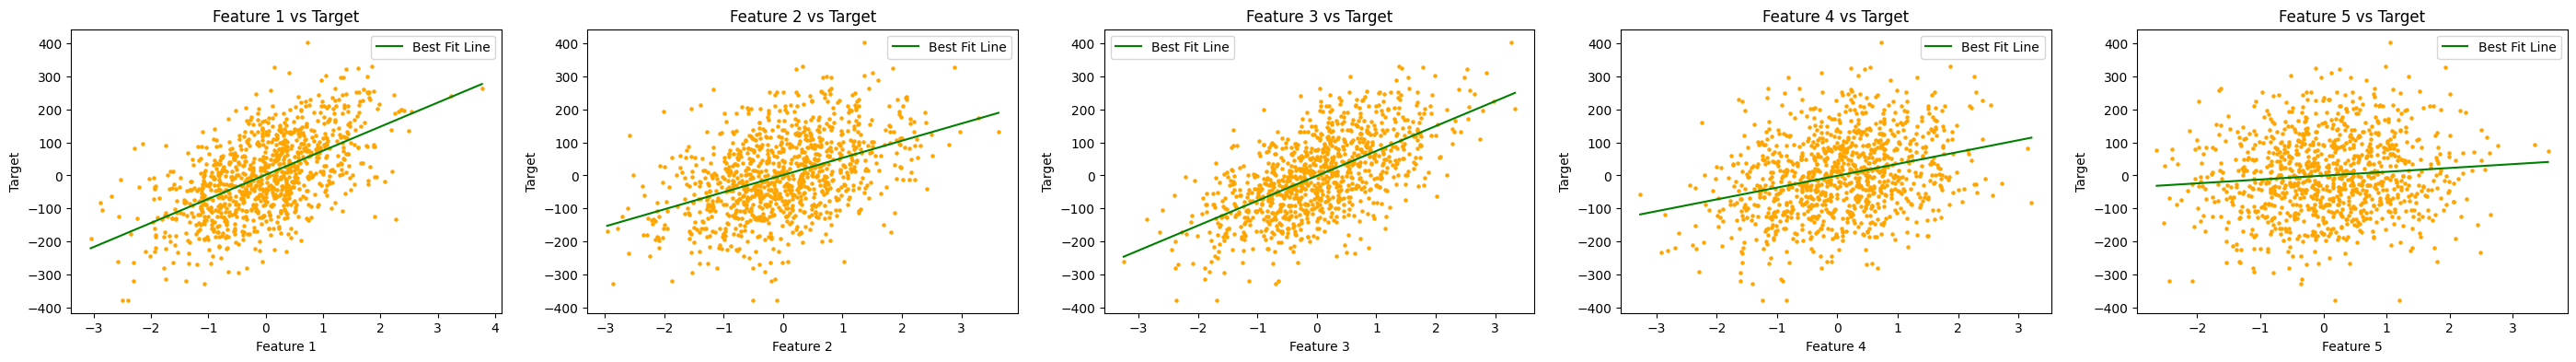

In [3]:
figure,axes=plt.subplots(1,5,figsize=(35,4))
for i in range(5):
  plt.subplot(151+i)
  axis=axes[i]
  feature_i=x[:,i]
  
  plt.scatter(feature_i,y,color='orange',s=5)
  axis.set_xlabel(f'Feature {i+1}')
  axis.set_ylabel('Target')
  axis.set_title(f'Feature {i+1} vs Target')

  
  model = LinearRegression()
  model.fit(feature_i.reshape(1000, 1), y)
  x_line = np.linspace(np.min(feature_i), np.max(feature_i), 1000)
  y_line = model.predict(x_line.reshape(1000, 1))
  axis.plot(x_line, y_line, color='green', label='Best Fit Line')
  axis.legend()

# Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

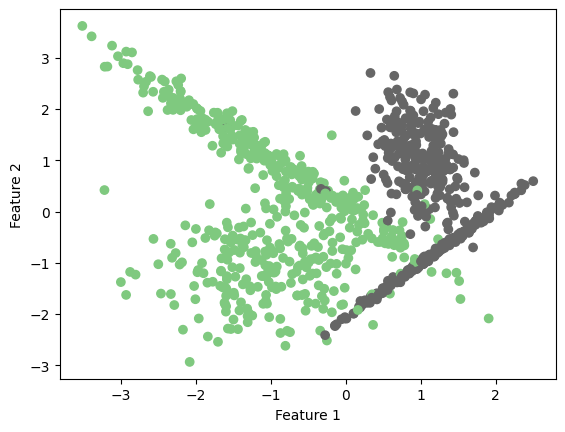

In [8]:
from sklearn.datasets import make_classification
A,b=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(A[:,0],A[:,1],c=b,cmap='Accent')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Question 3:
Make a clustering dataset with 2 features and 4 clusters.

Text(0.5, 1.0, 'Plot with 2 features and 4 centres')

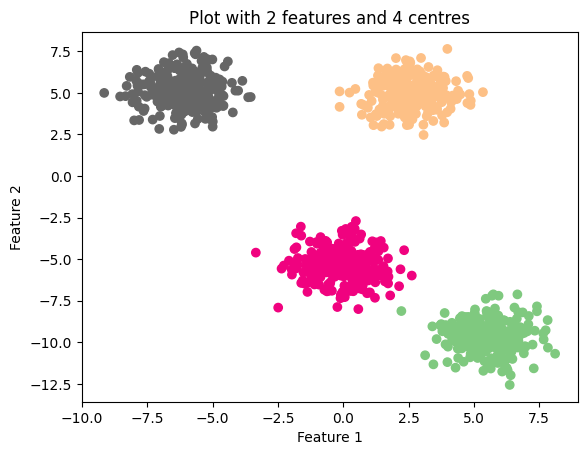

In [9]:
from sklearn.datasets import make_blobs
C,d=make_blobs(n_features=2,n_samples=1000,centers=4,random_state=10)

plt.scatter(C[:,0],C[:,1],c=d,cmap='Accent')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot with 2 features and 4 centres')


# Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [2]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup
page=req.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('table', {'id': 'main_table_countries_today'})

In [34]:
headers=[]
first_row=table.find('tr')
for i in first_row.find_all('th'):
    title=i.text
    headers.append(title)

In [35]:
mydata=pd.DataFrame(columns=headers)
for j in table.find_all('tr')[8:240]:
    row_data=j.find_all('td')
    row=[i.text for i in row_data]
    length=len(mydata)
    mydata.loc[length]=row


In [36]:
mydata=mydata.rename(columns={'Country,Other':'Country'})
mydata=mydata[['Country', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]
mydata

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,World,All,,"689,020,216","+18,561","6,880,579",+159,"661,408,721","+15,327","20,730,916"
1,USA,North America,"334,805,269","107,042,460",,"1,164,345",,"105,073,304",,"804,811"
2,India,Asia,"1,406,631,776","44,986,934",,"531,839",,"44,447,472",,"7,623"
3,France,Europe,"65,584,518","40,054,863",,"167,052",,"39,824,288","+1,098","63,523"
4,Germany,Europe,"83,883,596","38,422,054",,"173,995",,"38,229,300","+2,100","18,759"
...,...,...,...,...,...,...,...,...,...,...
227,Vatican City,Europe,799,29,,,,29,,0
228,Western Sahara,Africa,"626,161",10,,1,,9,,0
229,MS Zaandam,,,9,,2,,7,,0
230,Tokelau,Australia/Oceania,"1,378",5,,,,,,5


The optional challenge part.

In [37]:
mydata=mydata.replace(',','',regex=True)
mydata = mydata.replace(['', ' ', 'N/A'], '0')
for x in ['NewCases','NewDeaths','NewRecovered']:
    mydata[x]=mydata[x].str.replace('+','')
mydata[['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]=mydata[['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']].astype('int64')

In [15]:
print(mydata.dtypes)
mydata

Country           object
Continent         object
Population         int64
TotalCases         int64
NewCases           int64
TotalDeaths        int64
NewDeaths          int64
TotalRecovered     int64
NewRecovered       int64
ActiveCases        int64
dtype: object


,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,World,All,0,689020216,18561,6880579,159,661408721,15327,20730916
1,USA,North America,334805269,107042460,0,1164345,0,105073304,0,804811
2,India,Asia,1406631776,44986934,0,531839,0,44447472,0,7623
3,France,Europe,65584518,40054863,0,167052,0,39824288,1098,63523
4,Germany,Europe,83883596,38422054,0,173995,0,38229300,2100,18759
...,...,...,...,...,...,...,...,...,...,...
227,Vatican City,Europe,799,29,0,0,0,29,0,0
228,Western Sahara,Africa,626161,10,0,1,0,9,0,0
229,MS Zaandam,0,0,9,0,2,0,7,0,0
230,Tokelau,Australia/Oceania,1378,5,0,0,0,0,0,5


I don't know why China's row is coming at the bottom of the dataframe when its 92nd or 93rd row in the HTML code.... I don't know iska kya bias hai :'(

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [39]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_informative=2,n_redundant=0,weights=[0.95,0.05])
Counter(y)

Counter({0: 945, 1: 55})

Text(0, 0.5, 'Feature 2')

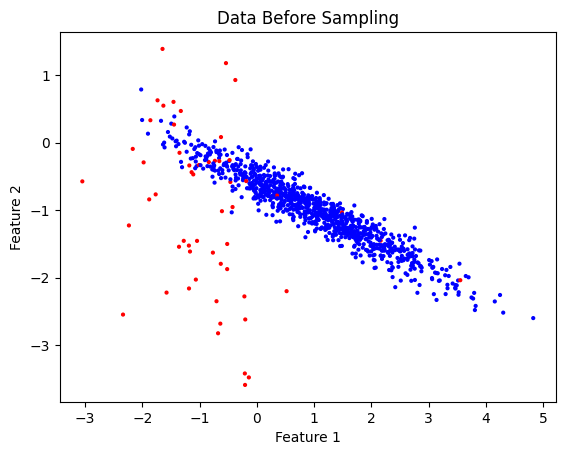

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr',s=4)
plt.title('Data Before Sampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Counter({0: 945, 1: 236})


Text(0, 0.5, 'Feature 2')

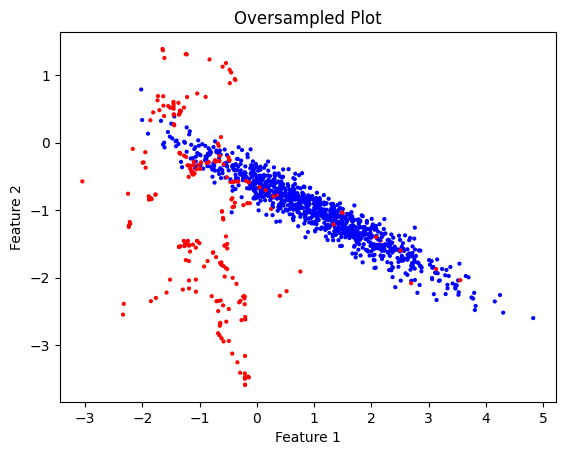

In [41]:
oversampler=SMOTE(sampling_strategy=0.25)
X2,y2=oversampler.fit_resample(X,y)
print(Counter(y2))
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap='bwr',s=4)
plt.title('Oversampled Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Counter({0: 165, 1: 55})


Text(0.5, 1.0, 'Undersampled Plot')

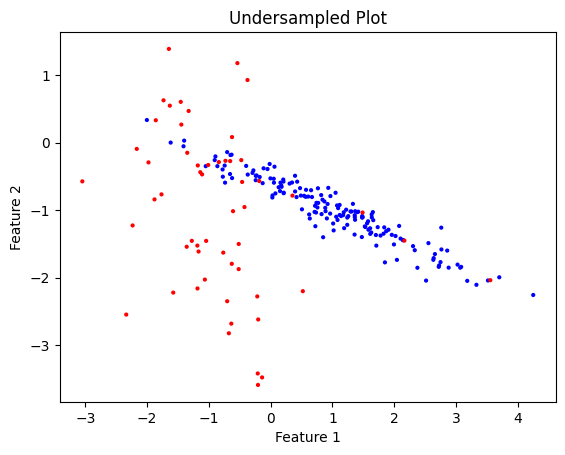

In [42]:
undersampler=RandomUnderSampler(sampling_strategy=1/3)
X3,y3 = undersampler.fit_resample(X,y)
print(Counter(y3))
plt.scatter(X3[:,0],X3[:,1],c=y3,cmap='bwr',s=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Plot')

#### **Remark:**
~ _In the question, it is unclear whether the undersampling has to be done on the raw data or the oversampled data, in the code above I have performed the undersampling on the original raw data. However, if undersampling was intended to be done on the oversampled data, just pass (X2,y2) to the resample function, rest of the code would remain the same._

# Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [43]:
from sklearn.datasets import load_iris
import pandas

In [44]:

iris=load_iris()
X=iris.data
y=iris.target
df=pandas.DataFrame(X,columns=iris.feature_names)
df['target']=pandas.Series(y)


In [45]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

There are no missing values in the dataset as seen above :)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30)
print(f"Dimensions of the training set: {X_train.shape} and equal number of targets")
print(f"Dimensions of the testing set: {X_test.shape} and equal number of targets")

Dimensions of the training set: (105, 4) and equal number of targets
Dimensions of the testing set: (45, 4) and equal number of targets


In [47]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
new_X_train=scalar.fit_transform(X_train)
new_X_test=scalar.fit_transform(X_test)

new_df=pandas.DataFrame(new_X_train, columns=iris.feature_names)
new_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.916171,-0.635182,1.364337,0.979624
1,0.951193,-0.173631,0.390979,0.309086
2,-0.134408,-0.173631,0.276466,0.040871
3,-0.616897,1.441797,-1.269455,-1.300205
4,-0.496274,1.903347,-1.154942,-1.031990
